# Lab 5: Simple OOP and numpy


__Student:__ Biswas Kumar (bisku859)

__Student:__ Julia Lindohf (julso810)


# 2. Introduction

## Object-oriented Programming

The point of Object-oriented Programming is to support encapsulation and the DRY (Don't Repeat Yourself) principle without things getting out of hand. Often, software architects (those high-level programmers who are responsible for how large systems are designed on a technical level) talk about Object-oriented design or Object-oriented analysis. The point of this is to identify the necessary _objects_ in a system. An object in this sense is not exactly the same as a Python object but rather a somewhat higher level logical unit which can reasonably be thought of as an independent component within the system. These high level objects might then be further subdivided into smaller and smaller objects and at a some level the responsibility shifts from the system architect to the team or individual developer working on a specific component. Thus, Object-oriented thinking is necessary for anyone developing code which will be integrated with a larger system, for instance a data scientist implementing analytics tools.

## OOP in Python

Python implements the Object-oriented paradigm to a somewhat larger degree than the Functional paradigm. However, there are features considered necessary for _strict_ object-oriented programming missing from Python. Mainly, we are talking about data protection. Not in a software security sense, but in the sense of encapsulation. There is no simple way to strictly control access to member variables in Python. This does not affect this lab in any way but is worth remembering if one has worked in a language such as Java previously.

# 3. Simple instance tests in Python

Note: some of these questions will be extremely simple, and some might prove trickier. Don't expect that the answer needs to be hard.

In [2]:
class Person:
    def __init__(self, name):
        self.name = name
        self.age = 0          # Age should be non-negative.
        
    def get_age(self):
        """Return the Person's age, a non-negative number."""
        return self.age
    
    def return_five(self):
        """Return 5. Dummy function."""
        return 5

Jackal = Person 

president = Person("Jeb") 
psec = Jackal("CJ Cregg")     

a) Change the age of the `president` to 65 (`psec` should be unaffected).

In [6]:
president = Person("Jeb") 
president.age = 65  
print(president.get_age())    
print(president.name)     

65
Jeb


[Note: This mode of operation is sometimes considered poor OOP. We will remedy this later.]

b) How many `Person` instances are there? One, two or three?

In [4]:
# "While the class is the blueprint, an instance is a copy of the class with actual values, literally an object belonging to a specific class."
# Enligt https://realpython.com/python3-object-oriented-programming/

# Therefore are two instances, to the class Person here. Jackal is a class not an instance.
print(isinstance(Jackal, Person)) #False
print(isinstance(president, Person)) #True
print(isinstance(psec, Person)) #True    

False
True
True


c) Consider the following code snippets. What do you think that they will return, and why? Discuss amongst yourselves. After that, run the code and explain the output. You only need to write down your explanation of the output.

In [7]:
"Jeb" is Person   

False

In [11]:
president is Person    

False

In [ ]:
# Your answer goes here.
# - "Jeb" is a string, not an instance. Therefore the reply is false. 
# The instance variables are defined within the methods. 
# On the other hand, president.name is an instance
# - The is operator compares if president and Person is the same object with different names, 
# but president is an instance of the class Person, therefore different objects.

d) How would you go about checking whether or not the value bound to the name `president` is-a `Person`?

In [6]:
print(isinstance(president, Person))  

True


# 4. Subclasses

a) Create class `Employee`, a subclass of `Person` with data attributes (fields) 
* `__work_days_accrued`
* `__daily_salary`. 

These should be *the only* data attributes which you write in your class definition. In particular, you may not duplicate `name` and `age`.

There should be methods
* `work` which increments the number of work days accrued.
* `expected_payout` which just returns the expected payout for the employee based on the accrued work days and daily salary (but without doing any resets).
* `payout` which returns the accrued salary and resets the number of work days accrued. The `payout` function may not perform any calculations itself.

In [13]:
# Your code goes here.
# https://www.w3schools.com/python/python_inheritance.asp

class Employee(Person):
    def __init__(self, name, daily_salary=15): # 15 crowns is the default value
        # help reference 
        # https://www.programiz.com/python-programming/methods/built-in/super
        super().__init__(name = name) # name belongs to the initial super state
        self.__work_days_accrued = 0
        self.__daily_salary = daily_salary
        
    def work(self): 
        self.__work_days_accrued += 1 
        
    def expected_payout(self): 
        temp1 = self.__work_days_accrued
        temp2 = self.__daily_salary
        current_salary = temp1 * temp2
        return current_salary

    def payout(self):
        accrued_salary = self.expected_payout()
        self.__work_days_accrued = 0 
        return accrued_salary # den totala summan, den anställda får 

# Ready-made tests.
print("--- Setting up test cases.")

cleaner = Employee(name = "Scruffy")  # Should have daily_salary 15 crowns.
josh = Employee(name = "Josh", daily_salary = 1000)
toby = Employee(name = "Toby", daily_salary = 9999)

josh.work()
josh.work()
toby.work()
toby.work()
toby.work()
cleaner.work()

print("--- Testing payout and expected_payout properties.")
assert cleaner.expected_payout() == 15, "default salary should be 15"
assert josh.expected_payout() == 1000*2
assert josh.payout() == 1000*2
assert josh.expected_payout() == 0, "salary should be reset afterwards"
assert toby.payout() == 9999*3, "toby and josh instances should be independent."
print("OK")

print("--- Testing non-data-accessing calls to superclass methods.")
assert josh.return_five() == 5, "Person.return_five should be accessible"
print("OK")

print("--- Testing data that should be set up by initialiser call.")
assert josh.get_age() == 0, "superclass method should be callable, values should not be missing."
josh.age = 9
assert josh.get_age() == 9, "superclass method should be callable"
print("OK")    

--- Setting up test cases.
--- Testing payout and expected_payout properties.
OK
--- Testing non-data-accessing calls to superclass methods.
OK
--- Testing data that should be set up by initialiser call.
OK


b) Which public data attributes (fields) does an `Employee` have? Can you access the age of an employee directly (without some transformation of the name)? The daily salary?

In [14]:
# Answer here.
print(josh.age)
print(josh.name)
# print(josh.__work_days_accrued) ingen åtkomst
# print(josh.__daily_salary) ingen åtkomst
#josh, 
# The age of the employ, also their nme could be accessed, since the subclass employ has inherited all public attributes from the parent object. 

# It is impossible to have any access to the local variables, such as  __work_days_accrued and __daily_salary, with underscores

 

9
Josh


# 5. Introductory numpy

A lot of computations will likely end up using data stored `numpy` arrays. Therefore, it is a good idea to have a feeling for how they are used and manipulated. The following steps will provide some introduction, so that we can build upon this in future labs.

You may want to refer to the [official numpy.org absolute beginners guide to numpy](https://numpy.org/devdocs/user/absolute_beginners.html).

a) Import the module `numpy`, giving it the shorthand `np`.

In [9]:
import numpy as np      

b) Create the $2 \times 3$ matrix $A = \begin{bmatrix}1 & 2 & 3 \\ 0 & 0 & 1\end{bmatrix}$

In [256]:
A=np.matrix('1 2 3;  0 0 1')
print(A)      

[[1 2 3]
 [0 0 1]]


c) Create the vector $b = \begin{bmatrix}1\\ 2 \\ 3 \end{bmatrix}$

In [257]:
b = np.matrix('1; 2; 3')
print(b)       

[[1]
 [2]
 [3]]


d) Perform the multiplication $Ab$. What is the result?

In [258]:
res = np.dot(A, b)
print(res)     

[[14]
 [ 3]]


e) Mathematically, what should the dimensions of $b^Tb$ be? What should the dimensions of $bb^T$ be?

In [ ]:
"""
    Answer here.
     b is a 1*3 matrix, and t(b) is a 3*1 matrix, 
     thus b*t(b) is a 3*3 matrix  
     whilst t(b) * b is a 1*1 matrix 
     
"""

f) Compute ```b.T @ b```? ```b @ b.T``` in numpy. How would you go about calculating $bb^T$ (if you wanted to actually store it as a matrix, which is rarely the most space- or time-efficient idea)?

In [259]:
Tb = np.transpose(b) 
#print(Tb)
result1 = np.dot(Tb, b)
print(result1) 
result2 = np.dot(b, Tb)
print(result2)  
# the result follows the same pattern, as expected in task e  

[[14]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


Note: as `a @ b` is read `a.dot(b)` this should perhaps not be entirely surprising. But it is non-obvious.

d) Try to solve the equation $Ax = b$ using the `solve` method. Does this make mathematical sense? What does numpy say? Read the error message.

In [260]:
A = np.array([[1, 2, 3],
             [0, 0, 1]])
print(A)
b = np.array([1, 2, 3])
print(b)
x = np.linalg.solve(A, b)         

[[1 2 3]
 [0 0 1]]
[1 2 3]


LinAlgError: Last 2 dimensions of the array must be square

In [28]:
"""
    Write your explanation as a code comment.
    
    This procedure does not make any mathematical sense. 
    The number of elements in A is 3*2; 
    the number of elements in b is 3*1
    It does not make any sense numerically, since the operation does not have any solution. 
    
    The error message is: LinAlgError: Last 2 dimensions of the array must be square
"""

array([14,  3])

e) Try to solve the equation $A^Tx = b$ using numpy. Does this make mathematical sense? What does numpy say?

In [261]:
A = np.matrix('1 2 3;  0 0 1')
b = np.matrix('1; 2; 3')
AT = np.transpose(A) 
print(AT)
print(b)
resultat = np.linalg.solve(AT, b)        

[[1 0]
 [2 0]
 [3 1]]
[[1]
 [2]
 [3]]


LinAlgError: Last 2 dimensions of the array must be square

In [62]:
"""
    Write your explanation as a comment here.
    Again, it does not make any sense, according to numpy, which is outlandish 
    
    The dimension of the transpose of A is a 2*3 matrix 
    The dimension of b is a 3*1 column vector. 
    
    When calculating by hand, there is a solution, which is a column vector [1, 0]'
    The comment from the numerical calculation is not by any means of bona fide statement. 
    For this reason, a different numerical algorithm is needed for this task. 
"""

"\n    Write your explanation as a comment here.\n    Again, it does not make any sense, according to numpy, which is outlandish \n    \n    The dimension of the transpose of A is a 2*3 matrix \n    The dimension of b is a 3*1 column vector. \n    \n    When calculating by hand, there is a solution, which is a column vector [1, 0]' \n    For this reason, a different numerical algorithm is needed for this task. \n"

f) One of the two tasks above make sense from a mathematical point of view. Find a best solution $x$ in the least squares sense.

In [262]:
import numpy as np 

A = np.matrix('1 2 3;  0 0 1')
b = np.matrix('1; 2; 3')


# The solution for A^T * x =b, which is the only solution, since b is a 1*3 column vector 
AT= np.transpose(A)  
led1 = np.linalg.inv(np.dot(A, AT)) 
led2 = np.dot(led1, A)  
led3 = np.dot(led2, b)
x1= led3

# the solution for A*x=b , there is no solution, the dimensions do not agree with each other
led11= np.dot(AT, A)
print(led11)  

# using a numpy method to find a solution: Return the least-squares solution to a linear matrix equation.
x = np.linalg.lstsq(AT, b, rcond=None)[0]  
print(x) 

# The obtained answer from this round of calculation agrees well with the hand calculated results.  

[[ 1  2  3]
 [ 2  4  6]
 [ 3  6 10]]
[[1.00000000e+00]
 [1.78031751e-16]]


g) Is the resulting $Ax$ or $A^Tx$ (depending on your choice above) close to $b$? What is the norm-2-distance between the vectors?

In [263]:
# to calculate the product separately: 
# the product of Ax 
Atx= np.dot(AT, led3)
print(Atx)  

# The norm 2 distance is zero, since the results agree perfectly with each other.   
dist_current = b-np.dot(AT, x)
np.linalg.norm(dist_current)  

# the procedure has altered completely, using a numpy function, rather a home carpenting method. 
# the magnitude of the norm 2 distance goes to zero. 
# https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.linalg.lstsq.html

x,residuals,rank,s = np.linalg.lstsq(AT, b, rcond=None) 
residuals     

[[1.]
 [2.]
 [3.]]


matrix([[2.01291304e-31]])

Just to get some practice, run the following to get some test data:

In [264]:
import sklearn
# https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets
# This package contains the methods to load and fetch popular reference datasets. 
# It also features some artificial data generators
import sklearn.datasets as ds
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
houses = ds.fetch_california_housing()
print(houses)      

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characte

h) How many rows does the dataset have? Columns? Find out using numpy. (First check what `houses` actually is)

In [265]:
storlek =np.size(houses.data) 
print("the total number of elements", storlek) # antal element 

dimensioner = houses.data.shape
print("the number of rows is: ", dimensioner[0]) 
print("the number of columns is", dimensioner[1])   

the total number of elements 165120
the number of rows is:  20640
the number of columns is 8


i) Get the third column (remember: indexing starts at zero, so column number 2) of the dataset by indexing/slicing.

In [266]:
houses.data[:,2]   

array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698])

j) Get the values of the third, fourth and hundredrth rows (that is, index 2, 3, 99).

In [37]:
houses.data[(2,3,99),:]  

array([[ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 2.61040000e+00,  3.70000000e+01,  3.70714286e+00,
         1.10714286e+00,  1.83800000e+03,  1.87551020e+00,
         3.78200000e+01, -1.22260000e+02]])

k) Mathematical sanity check: without actually computing the rank of ```houses.data```, can you provide a bound? Could it have $10^{15}$ linearly independent rows? 2000? Etc. Write down the tightest bound you can find, and explain why briefly.

Anders' comment upon this task: Can you provide as good a bound as you can without performing any computations then? It might not be a very tight bound, but there is something you can say.

In [267]:
# You may want to look at some properties of the matrix here.
# "The rank of a matrix is defined as (a) the maximum number of linearly independent column vectors in the matrix or (b) the maximum number of linearly independent row vectors in the matrix."

# The tighest bound depends upon the dimension of the matrix, the number of linearly independent rows and columns 

tight_bound = min(houses.data.shape[0], houses.data.shape[1]) 
print("The tightest bound is" , tight_bound)   
print(houses.data.shape[0])
print(houses.data.shape[1])  

# The print has shown that the tightest bound is the number of independent row vectors. 


The tightest bound is 8
20640
8


l) Find out the actual rank of the matrix using numpy. 

In [268]:
from numpy.linalg import  matrix_rank
print("The actual rank of the matrix is", matrix_rank(houses.data))    

The actual rank of the matrix is 8


# 6. A simple classifier

Our goal in this section is to build a naïve subspace-projection based classifier which takes a numerical vector and produces a label. We will build this from the ground up (there are many libraries that perform this automatically, but may not use them in this case).

We will first practice our numpy (and linear algebra) skills to build the algorithm, and then encapsulate data and methods in a class. We will be taking a slightly different route than more general SVD methods for finding principal components, simply because this is not our task. This is worth remembering if you find material on the subject!

The main idea here is to pick out all the data corresponding to a certain set of vectors, and reduce this matrix to some rank $\leq k$ matrix which is a good approximation of the row space in some sense (here: the sense that the vectors correspond to maximal singular values). A naïve classification is then given by picking the subspace which is closest by orthogonal projection.

## The dataset

First, we will import some data. Here we use the classic MNIST data set of handwritten digits. We can naturally partition the sets of vectors used for training and validation in many ways. Feel free to experiment with a nicer (possibly non-deterministic) version later. This is only to get us started, and to have a set of data with known properties (which is helpful for lab assistants).

In [1]:
import sklearn.datasets as ds
import numpy as np    

digits = ds.load_digits()
training_digits = digits.data[0:600, :]
training_labels = digits.target[0:600]

# The set of labels can be found in digits.target_names.
print(training_digits)
print(training_labels)  

# to obtain its dimension: 
print(training_digits.shape)  
print(training_labels.shape)          

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  0. ... 12.  0.  0.]
 [ 0.  0.  1. ... 16. 16.  8.]]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8
 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2
 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4 5 6 7 8 9 0 1 2

If we are curious, we can view the images from the dataset.

Text(0.5, 0, 'Index: 5, actually the number 5')

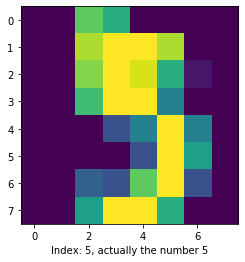

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt 
# We show one of the digits.
d_index = 5 
plt.imshow(training_digits[d_index].reshape(8,8))
plt.xlabel(f"Index: {d_index}, actually the number {training_labels[d_index]}")  
# Note: digits.images[i] is the same as digits.data[i], but in 8x8 format (no need to reshape).
# We would however like to stress that the 64 pixel images we'll be working with are stored in vector format.     

## Tasks

a) Get all rows with label 4. Store that in the matrix $A_4$. Similarly for $A_9$. This should be two single lines of code!

In [3]:
ll = len(training_labels)

# a4 = digits.data[[index for index in range(0,ll) if training_labels[index]==4 ], :] 
# revision, the standard numpy method has been utilised in the second attempt
a4 = digits.data[np.where(training_labels == 4)]
print(a4) # Replace with your code. 
# a9 =digits.data[[index for index in range(0,ll) if training_labels[index]==9 ], :]
# again, a standard numpy method has been used in the second attempt
a9 = digits.data[np.where(training_labels == 9)]
print(a9) # Replace with your code.  
 
# Both matrice have the same dimensions 
print(a4.shape)   
print(a9.shape)            

[[0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 8. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]]
[[ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  6. ... 13. 11.  1.]
 [ 0.  0.  9. ... 12. 11.  0.]
 ...
 [ 0.  0.  2. ... 16.  6.  0.]
 [ 0.  0.  1. ...  7.  0.  0.]
 [ 0.  0.  6. ... 12.  0.  0.]]
(57, 64)
(59, 64)


b) Compute the thin SVD $A_4 = U_4\Sigma_4 V^T_4$ and similarly for $A_9$. Thin here means that you do not necessarily get the full-rank square $U,V^T$ matrices.

In [4]:
# the calculation of Singular Value Decomposition, by using a standard numpy function.
u4, s4, vh4 = np.linalg.svd(a4, full_matrices=False)
print(vh4)
u9, s9, vh9 = np.linalg.svd(a9, full_matrices=False)
print(vh9)          

[[ 0.00000000e+00  0.00000000e+00 -5.74647651e-03 ... -3.06660420e-02
   0.00000000e+00  0.00000000e+00]
 [ 1.66533454e-16  0.00000000e+00  3.12734640e-02 ... -8.26760534e-02
   0.00000000e+00  0.00000000e+00]
 [-1.66533454e-16  0.00000000e+00  2.33459622e-02 ... -1.40747976e-01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.06705906e-02  5.16365368e-03  2.82693561e-16 ...  1.10046521e-16
   0.00000000e+00  0.00000000e+00]
 [ 7.61135392e-03 -4.30445515e-04 -3.77679665e-16 ... -8.13964781e-17
   0.00000000e+00  0.00000000e+00]
 [-6.45991785e-03  3.39168401e-03  2.40344031e-16 ...  4.42354486e-17
   0.00000000e+00  0.00000000e+00]]
[[-3.33066907e-16 -9.48133775e-04 -9.38773173e-02 ... -1.55675601e-01
  -3.63006343e-02 -7.62423630e-04]
 [-1.80411242e-16  2.64096177e-03  8.53393857e-02 ...  2.41756206e-01
   1.08817123e-01  5.33215327e-03]
 [-5.06539255e-16 -1.01020764e-03 -4.59422314e-02 ...  2.15155300e-01
   2.93294904e-02 -4.77935085e-03]
 ...
 [-1.06609107e-03 -2.83884109e-15  5.7651681

**Note** Our data is stored by row (one row per digit). What we use the different matrices in the decomposition for is thus slightly different than if it was stored by column. Instead of picking the best $k$ columns of $U$ we pick the best $k$ rows of $V^T$.

c) Let $sample4$ be the first row of $A_4$ and $sample9$ be the first row of $A_9$.

In [5]:
print('dimension of a4 is ', a4.shape) 
# each of which has 57 rows of data 
𝑠𝑎𝑚𝑝𝑙𝑒4=a4[0] 
print(𝑠𝑎𝑚𝑝𝑙𝑒4)

print('dimension of a9 is ', a9.shape)
# each of which has 59 rows of data 
𝑠𝑎𝑚𝑝𝑙𝑒9=a9[0]
print(𝑠𝑎𝑚𝑝𝑙𝑒9)              

dimension of a4 is  (57, 64)
[ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
  1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
  0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
  0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]
dimension of a9 is  (59, 64)
[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]


d) Let $R$ be the first 3 rows of $V^T$. Compute the orthogonal projection of $sample4$ onto the row space of $R_4$, and onto the row space of $R_9$

In [6]:
from numpy import linalg as LA
# Your code here.
# the first index is the zeroth index in python
R4 = vh4[[0,1,2],:]

# Your code here
R9 = vh9[[0,1,2],:] 

frac4 = R4@sample4
frac9 = R9@sample9  
    
coeffs_in_r4 = frac4@R4 # What are the coordinates of sample4 orthogonally projected onto R4?

coeffs_in_r9 = frac9@R9    

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html 
sample4_in_r4 = np.linalg.norm(coeffs_in_r4-sample4)  
sample9_in_r9 = np.linalg.norm(coeffs_in_r9-sample9) 
print("Norm one is", sample4_in_r4) 
print("Norm two is", sample9_in_r9)        

# in this step, the previous steps are gone, instead, the numpy functions have been used, 
# to calculate the orthogonal projection.     

Norm one is 19.75899698363074
Norm two is 29.93786823269643


[Mathematical aside: where did the $\Sigma$ go? This is a very important matrix, and strongly affects both interpretations and (in general) row- and column spaces. *Assuming* that the rank is $\geq 3$ the row spaces should be the same whether or not we scale the basis vectors by some $\sigma_i$ (since $\sigma_i > 0$ for all $i=1,2,\ldots, r$). That is enough for our application, though the interpretations of the vectors might be different. The rank assumption is rather important, and we will make rather casually based on knowledge about the data set. Later, we'll include a check for this in our code.]

e) Which of the projections is closest to sample4 (in the sense that the difference (sample4_in_z**?**t - sample4) as the smallest 2-norm?

In [7]:
diff_sample4 = abs(sample4 - coeffs_in_r4) 
print("the difference amongst all values", diff_sample4) 

ref_diff = min(diff_sample4) 
ld = len(diff_sample4) 
print("magnitude of a specific distance", ref_diff) 

# to investigate which indice corresponds to ref_diff, using for comprehension 
indice = [ind for ind in range (0, ld) if diff_sample4[ind] == ref_diff] 
print("Comprehension method", indice)
# to use a standard numpy function
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
indice_attempt2 = np.where(diff_sample4 == ref_diff)[0]      
# the printed value are identical, therefore the obtained indice are sufficiently reliable  
print("the obtained indice, using np.where is", indice_attempt2)  
 
# both methods leads to the same results, the second is a much more memory efficient method, however.    

the difference amongst all values [4.71042574e-16 0.00000000e+00 4.23037607e-01 2.22908477e-01
 1.94945372e+00 2.30120798e+00 0.00000000e+00 0.00000000e+00
 1.56213431e-18 5.85463554e-02 1.17560185e+00 1.81141386e+00
 5.52525849e+00 1.92979168e+00 4.47876351e-02 0.00000000e+00
 2.28036908e-29 4.15054965e-01 2.77475664e+00 1.67507345e+00
 7.29944793e-01 2.83187895e+00 5.63504103e-01 4.88862904e-03
 1.09022381e-02 1.14899039e+00 4.40586622e+00 6.23809166e+00
 3.01911869e+00 2.30125141e+00 4.08266723e+00 0.00000000e+00
 0.00000000e+00 4.36172868e-01 2.19225871e+00 1.50611840e+00
 9.55037105e+00 2.84801069e+00 2.09336004e+00 0.00000000e+00
 0.00000000e+00 2.15201479e+00 7.05287031e+00 5.97451344e+00
 1.17761530e+00 2.53962292e+00 1.02180464e+00 0.00000000e+00
 0.00000000e+00 1.46057793e-01 3.43397894e-01 3.10089924e+00
 1.08707237e+00 2.45113883e+00 4.37315640e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.04706461e-01 1.46731051e+00
 1.41658798e+00 4.78699073e-01 0.00000000e+00 0.000

f) Create a function `split_data(data, data_labels, labels)` which takes a matrix of data (such as `training_data`), the labels of all rows (such as `training_labels`) and a vector of the labels (here the numbers 0,...,9) and returns a dictionary mapping a label to the matrix of all corresponding data. 

Here the dictionary would for instance have the key 2, and the corresponding value be the matrix of all the images in `data` classified as the number 2.

In [8]:
import numpy 
# att skapa en dictionary här

def split_data(data, data_labels, labels): 
    # to calculate the number of columns and rows 
    Nr_columns = data.shape[0] 
    Nr_rows = data.shape[1]
    # Only the data with the intended index should be kept from this function
    data_split = {index:data[np.where(data_labels==index)] for index in labels}
            
    return data_split
# a vector of the labels (here the numbers 0,...,9) 
current_label = np.array([0,1,2,3,4,5,6,7,8,9])  
 
temp_data = split_data(training_digits, training_labels, current_label)  
print('the first test, 0 - 9: ', temp_data )               
print(temp_data[1].shape) 

current_label2 = np.array([ 2 ])  
 
temp_data2 = split_data(training_digits, training_labels, current_label2)  
print('the second test, 2: ', temp_data2)        

the first test, 0 - 9:  {0: array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       [0., 0., 3., ..., 4., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 2., ..., 1., 0., 0.],
       [0., 0., 1., ..., 7., 0., 0.]]), 1: array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       ...,
       [ 0.,  0., 10., ..., 16., 16., 11.],
       [ 0.,  0.,  3., ..., 16., 15., 11.],
       [ 0.,  0.,  5., ..., 16., 11.,  2.]]), 2: array([[ 0.,  0.,  0., ..., 16.,  9.,  0.],
       [ 0.,  0.,  5., ..., 13., 12.,  4.],
       [ 0.,  0.,  8., ..., 12., 13.,  1.],
       ...,
       [ 0.,  0.,  3., ..., 12., 14.,  7.],
       [ 0.,  0.,  7., ..., 12., 12., 11.],
       [ 0.,  0.,  9., ..., 16., 16.,  3.]]), 3: array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.

f) Create a function `subspaces(labelled_data, k = 3)` that takes a dictionary such as above, and returns a dictionary mapping every occurring label $d$ to the respective $Z_d$ matrix with at most $k$ rows. Here the $Z_d$ matrices is defined as above, the best norm-2-approximation. If a particular matrix has a rank $r < k$, we should only keep $r$ rows (say, if there were many more *different* digit 9-rows in the training set, than digit 1:s)!


In [9]:
from numpy.linalg import matrix_rank


def subspaces(labelled_data, k=3):
    # to create an empty dictionary 
    d = {}  
    for labels in labelled_data.keys():
        
        u, s, UA = np.linalg.svd(labelled_data[labels], full_matrices=False)
        # the  𝑍𝑑  matrices is defined as above, the best norm-2-approximation
        r= matrix_rank(labelled_data[labels])
        
        if r < k:
            d[labels] = UA[0:r, ]
        else:
            d[labels] = UA[0:k, ]
    return d

rs = subspaces(temp_datan, 3)
print(rs[4].shape)  
print(rs[9].shape)               

(3, 64)
(3, 64)


g) Create a function `classification(spaces, x)` that takes a dictionary such as produced by `subspaces` above and a single vector and produces the label of the subspace with the smallest norm-2-distance. In the task above, this would have meant that classifying $sample4$ would have produced the label 4 rather than 9, since $sample4$ was closer to the subspace $Z_4$ than the subspace $Z_9$.

In [10]:
def classification(spaces, x):
    # spaces: a dictionary which hass been produced by subspaces() from above 
    # x: a single vector 
    min_value=1000000000
    best_label =1
    # d.items() returns a liste of key-value pairs from a dictionary
    # there are two variables in each dictionary, key and value, therefore the for-loop needs to contain two variables
    for (key, value) in spaces.items(): 
        
        # values in each list is a specific subspace 
        tempk1 = value @ x.transpose() @ value
        # a standard numpy function here 
        tempk2 = np.linalg.norm(tempk1-x)
        
        if tempk2 < min_value: 
            min_value = tempk2
            best_label = key
            
    return best_label

print("result for sample 4 is", classification(rs,sample4) )

print("result for sample 9 is", classification(rs,sample9) ) 


# additional tests, aiming to test if other the function would mend other cases equally well
a7 = digits.data[np.where(training_labels == 7)]
𝑠𝑎𝑚𝑝𝑙𝑒7=a7[0] 
print("result for sample 7 is", classification(rs,sample7) )   
a8 = digits.data[np.where(training_labels == 8)]
𝑠𝑎𝑚𝑝𝑙𝑒8=a8[0] 
print("result for sample 8 is", classification(rs,sample8) )     
# the two additional tests confirm the fact that this function works sufficiently well      

result for sample 4 is 4
result for sample 9 is 9
result for sample 7 is 7
result for sample 8 is 8


h) Now pick the first 600 rows as training and the remaining (about 1100) as validation sets. What percentage does the classifier get right? What happens if you pick $k = 5, 10, 100, 1000$? Try it out. (The sharp-eyed student will notice that not all of these choices make sense from a mathematical perspective.)

In [11]:
from sklearn.metrics import confusion_matrix
# to compare the correct classification with the predicted classification 
# the last choice does not make sense, since 
input_data = digits.data
# to split the data into two chunks, training data and validation data 
# training data
training = input_data[0:600,]

classification_labels = digits.target

data_labels_training = classification_labels[0:600] 
# validation data
dlength = len(input_data)
validation = input_data[601: dlength,]
data_labels_validation = classification_labels[601:dlength] 
    
# to split the data 
splited_trainingdata=split_data(training, data_labels_training, temp_etikett)

def validation_est(k, validation, data_labels_validation, splited_trainingdata):
    training_subspaces=subspaces(splited_trainingdata, k) 
    # a vector of the labels (here the numbers 0,...,9) 
    temp_etikett = np.array([0,1,2,3,4,5,6,7,8,9]) 
    # to create an empty vector  
    ref_correct = []
    length_data = []
    
    for i in temp_etikett:
        # to obtain the current data 
        current_sample = validation[np.where(data_labels_validation == i)] 
        # to estimate the number of elements in each row of data
        current_length = current_sample.shape[0]
        validation_est =[] 
        
        for st in range( current_length ): 
            current_vector = current_sample[st]
            current_classofication = classification(training_subspaces,current_vector)
            validation_est.append(current_classofication) 
  
        ref_correct.append(validation_est.count(i))
        length_data.append(current_length)
          
    correct_pred = sum(ref_correct)
    num_elem = sum(length_data)
    correct_rate = correct_pred/num_elem     
    return correct_rate    
 
# k = 5 
#print(digits.data.shape) 
#print(digits.target.shape)       
correct_prediction_k5 = validation_est(k = 5, validation= validation, data_labels_validation= data_labels_validation, splited_trainingdata=splited_trainingdata)
print("for k = 5, the expected correct prediction is up to ", correct_prediction_k5)       

correct_prediction_k10 = validation_est(k = 10, validation= validation, data_labels_validation= data_labels_validation, splited_trainingdata=splited_trainingdata)
print("for k = 10, the expected correct prediction is up to ", correct_prediction_k10)  

correct_prediction_k50 = validation_est(k = 50, validation= validation, data_labels_validation= data_labels_validation, splited_trainingdata=splited_trainingdata)
print("for k = 50, the expected correct prediction is up to ", correct_prediction_k50) 

correct_prediction_k100 = validation_est(k = 100, validation= validation, data_labels_validation= data_labels_validation, splited_trainingdata=splited_trainingdata)
print("for k = 100, the expected correct prediction is up to ", correct_prediction_k100) 

correct_prediction_k10000 = validation_est(k = 10000, validation= validation, data_labels_validation= data_labels_validation, splited_trainingdata=splited_trainingdata)
print("for k = 10000, the expected correct prediction is up to ", correct_prediction_k10000)      
 
 

for k = 5, the expected correct prediction is up to  0.9280936454849499
for k = 10, the expected correct prediction is up to  0.9590301003344481
for k = 50, the expected correct prediction is up to  0.5409698996655519
for k = 100, the expected correct prediction is up to  0.5978260869565217
for k = 10000, the expected correct prediction is up to  0.5978260869565217


# 7. Encapsulating the classifier

Above we have a set of functions floating around in a global namespace. If we change some data and rerun some cells, we might get unexpected results. We instead want to encapsulate this in a single class.

a) Create a class `NaiveProjection`. It should have the following properties:
* An instance is created with `NaiveProjection(training_data, training_labels, all_labels, k)` where $k$ is optional (and defaults to 3). 

For instance, we should be able to run ```dig_class = NaiveProjection(training_data = digits.data[0:600,:], training_labels = digits.target[0:600], all_labels = digits.target_names)```.
* The class should have a method called `classification` which takes vector and returns the classification of that vector as defined above (minimum 2-norm distance to the subspace).
* The class should have a method called `hitrate` which takes a matrix of row vectors, a vector of correct labels and returns the rate of successfully classified 
* All data about subspaces and labels should be stored within the instance. We may not use any data stored outside (though it is of course OK to call outside functions). We should be able to create two (or more) independent classifiers

```
dig15 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], k = 15)
dig1 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], k = 1)
```
which should be entirely independent.

In [78]:
from numpy.linalg import matrix_rank

class NaiveProjection:

    def __init__(self, training_data, training_labels, all_labels, k):
        self.labels = all_labels

        # in accordance with the definition from the previous task
        # the vector is assumed to be a fixed vector currently
        current_label = [] 
        for i in all_labels:
            if i not in current_label:
                current_label.append(i)     
        current_label.sort()        
                
        # to split the training data, produced with the help of Charlie
        # to create a dictionary
        split_data = {index:training_data[np.where(training_labels==index)] for index in current_label}
        
        # by doing so, the original calculated data will not be changed in future calculations
        labelled_data = split_data
        # to create an empty space dictionary
        spaces = {} 
        
        for labels in labelled_data.keys():  
            
            u, s, UA = np.linalg.svd(labelled_data[labels], full_matrices=False)
            r = matrix_rank(labelled_data[labels])
            
            if r < k:
                spaces[labels] = UA[0:r, ]
            else:
                spaces[labels] = UA[0:k, ]      
        self.spaces = spaces   
        
        
    def classification(self, samplex):
        # again, two reference variables are used
        min_value=1000000000
        best_label =1
        
        spaces = self.spaces
        #print("Spaces: " + str(spaces))
        for (labels, each_space) in spaces.items(): 
            # values in each list is a specific subspace 
            # using the same method, which we have been using in task d previously 
            tempk1 = each_space @ samplex @ each_space
            # a standard numpy function here 
            tempk2 = np.linalg.norm(tempk1-samplex)
            if tempk2 < min_value: 
                min_value = tempk2
                best_label = labels    
      
        return best_label 
          
        
    def hitrate(self, validation_data, validation_targets):
        # validation_data, validation_targets, two input data
        # to create two empty vectors   
        ref_correct = []
        length_data = [] 
        # to create a list of unique validation labels 
        # to avoid using the same label, multiple times 
        validation_unique_labels = [] 
        for i in validation_targets:
            if i not in validation_unique_labels:
                validation_unique_labels.append(i)
                
        validation_unique_labels.sort()      
    
        # to perform the classification 
        for labels in validation_unique_labels:
            validation_est = []
            # to pick those rows that correspond to labels, one of which in validation_unique_labels
            current_sample = validation_data[np.where(validation_targets == labels)] 
            
            # to estimate the number of elements in each row of data
            current_length = current_sample.shape[0]
            length_data.append(current_length)
           
            for st in range(current_length): 
                current_vector = current_sample[st]                  
                current_classification = self.classification(current_vector)  
                validation_est.append(current_classification)
            
            ref_correct.append(validation_est.count(labels))  
            
        correct_pred = sum(ref_correct)
        num_elem = sum(length_data)
        correct_rate = correct_pred/num_elem 
       
        return correct_rate                           

There are several noteworthy issues here.
* We have taken a few mathematical shortcuts.
* There is no error handling. 
* We have not discussed overlapping subspaces, sampling strategies or the like.
* It might make a lot more sense to classify a matrix of vectors, rather than a single vector (to utilise the speed of computations). 

Most of this is left to an actual statistics course. The interested reader is referred to for instance Strang - Linear algebra and learning from data, or Golub & van Loan - Matrix computations.

In [79]:
# You can test here
dig1 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], digits.target_names, k = 1) 
dig15 = NaiveProjection(digits.data[0:600, :], digits.target[0:600], digits.target_names, k = 15)


print(f"Hit rate for k = 1: {dig1.hitrate(digits.data[601:], digits.target[601:])}")  
print(f"training data, k = 1: {dig1.hitrate(digits.data[0:600], digits.target[0:600])}")  
print(f"Hit rate for k = 15: {dig15.hitrate(digits.data[601:], digits.target[601:])}")      
print(f"training data, k = 15: {dig15.hitrate(digits.data[0:600], digits.target[0:600])}")                   

Hit rate for k = 1: 0.8478260869565217
training data, k = 1: 0.9033333333333333
Hit rate for k = 15: 0.967391304347826
training data, k = 15: 1.0


b) Experiment with different values of $k$ and training data/validation data sets. Plot the results using the library ```matplotlib```.

In [81]:
from matplotlib import pyplot as plt  

# three k values are included, k = 10, k = 100 and k = 1000 
k_value = np.array([1, 5, 10, 15, 30, 45, 50, 60, 90, 100, 200, 300, 400, 500, 1000]) 
k_length = len(k_value)

training_correct = [] 
validation_corret = [] 

for kvar in k_value: 
    #print(kvar)
    training_data = NaiveProjection(digits.data[0:600, :], digits.target[0:600], digits.target_names, k = kvar) 
    training_pred = training_data.hitrate(digits.data[0:600], digits.target[0:600]) 
    validation_pred = training_data.hitrate(digits.data[601:], digits.target[601:])
    training_correct.append(training_pred) 
    validation_corret.append(validation_pred) 

#print(training_correct)
#print(validation_corret)     

Text(0, 0.5, 'Correctness')

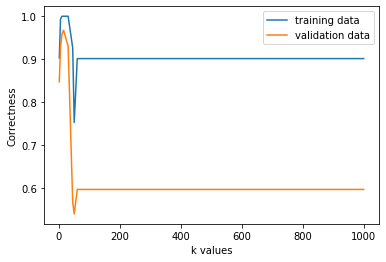

In [82]:
plt.plot(k_value, training_correct, label='training data') 
plt.plot(k_value, validation_corret, label='validation data') 
plt.legend()
plt.xlabel('k values')
plt.ylabel('Correctness')  

## Acknowledgments

This lab in 732A74 is by Anders Märak Leffler (2019), with a major revision in 2020. The introductory text is by Johan Falkenjack (2018).

Licensed under [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).